In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sasmodels.core import load_model
from sasmodels.direct_model import call_kernel 
import pandas as pd

## Spherical core 

*BlockCopolymerMicelle*

https://github.com/SASfit/SASfit/blob/master/src/sasfit_ff/sasfit_ff_BlockCopolymerMicelle.c

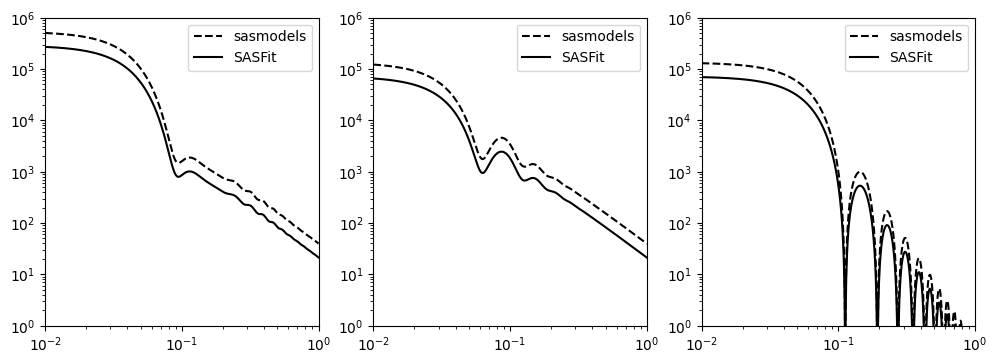

CPU times: user 1.05 s, sys: 93.6 ms, total: 1.15 s
Wall time: 703 ms


In [12]:
%%time
files = ["01_sphere_homogenous", "01_sphere_shell", "01_sphere_core"]
model = load_model("../models/spherical_micelle.py")
q_sasmodels = np.logspace(-2, 0, 1000)
kernel = model.make_kernel([q_sasmodels])

fig, axs = plt.subplots(1,3, figsize=(3*4, 1*4))
labels =['homogenous', 'shell', 'core']
linestyles = ['solid','dotted','dashed' ]
contrasts = [[1,2,2], [1,1,2], [1,2,1]]
for i in range(3):
    rho_solv, rho_s, rho_c = contrasts[i]
    sphere_params = {'v_core' : 4000.0,    
            'v_corona' : 4000.0,
            'sld_solvent' : rho_solv,
            'sld_core' : rho_s,
            'sld_corona' : rho_c,
            'radius_core': 40.0,
            'rg': 10.0,
            'd_penetration':1.0,
            'n_aggreg' : 67.0,
            }
    Iq_sasmodels = call_kernel(kernel, sphere_params)
    axs[i].loglog(q_sasmodels, Iq_sasmodels, ls='--', color='k', label="sasmodels")
    data_sasfit = pd.read_csv("./SASFit/%s"%files[i], sep=";", header=None).iloc[:,[0,1]]
    q_sasfit = data_sasfit.iloc[:,0]*0.1 # to convert into angstroms
    Iq_sasfit = data_sasfit.iloc[:,1]
    axs[i].loglog(q_sasfit, Iq_sasfit, color='k', label="SASFit")

    axs[i].set_ylim([1e0, 1e6])
    axs[i].set_xlim([1e-2, 1e0])
    axs[i].legend()
plt.show()

## Cylinder

*CYL+Chains(RW)_Rc* 
https://github.com/SASfit/SASfit/blob/master/src/sasfit_ff/cyl_rwbrush/sasfit_ff_cyl_rwbrush_rc.c

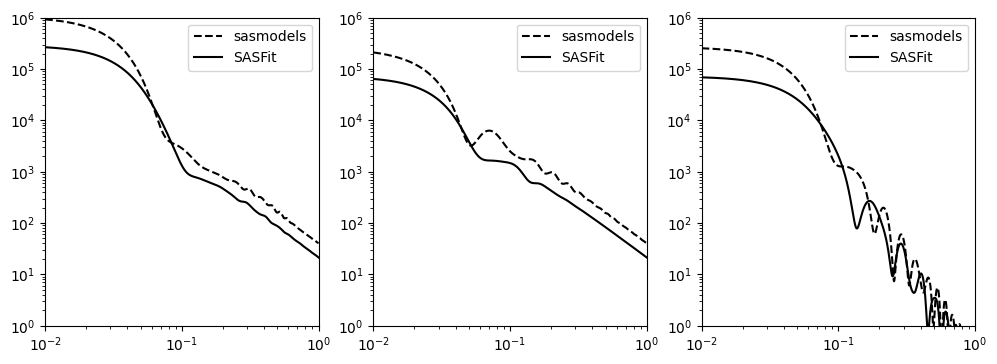

CPU times: user 1.22 s, sys: 95.9 ms, total: 1.32 s
Wall time: 788 ms


In [13]:
%%time

files = ["02_cylinder_homogenous", "02_cylinder_shell", "02_cylinder_core"]
model = load_model("../models/cylindrical_micelle.py")
q_sasmodels = np.logspace(-2, 0, 1000)
kernel = model.make_kernel([q_sasmodels])

fig, axs = plt.subplots(1,3, figsize=(3*4, 1*4))
labels =['homogenous', 'shell', 'core']
linestyles = ['solid','dotted','dashed' ]
contrasts = [[1,2,2], [1,1,2], [1,2,1]]
for i in range(3):
    rho_solv, rho_s, rho_c = contrasts[i]
    cyl_params = {'v_core' : 4000.0,    
            'v_corona' : 4000.0,
            'sld_solvent' : rho_solv,
            'sld_core' : rho_s,
            'sld_corona' : rho_c,
            'radius_core': 40.0,
            'length_core' : 100.0,
            'rg': 10.0,
            'd_penetration':1.0,
            'n_aggreg' : 67.0,
            }
    Iq_sasmodels = call_kernel(kernel, cyl_params)
    axs[i].loglog(q_sasmodels, Iq_sasmodels, ls='--', color='k', label="sasmodels")
    data_sasfit = pd.read_csv("./SASFit/%s"%files[i], sep=";", header=None).iloc[:,[0,1]]
    q_sasfit = data_sasfit.iloc[:,0]*0.1 # to convert into angstroms
    Iq_sasfit = data_sasfit.iloc[:,1]
    axs[i].loglog(q_sasfit, Iq_sasfit, color='k', label="SASFit")

    axs[i].set_ylim([1e0, 1e6])
    axs[i].set_xlim([1e-2, 1e0])
    axs[i].legend()
plt.show()

## Long cylinder or Rod 

*ROD+Chains(RW)_Rc* 

https://github.com/SASfit/SASfit/blob/master/src/sasfit_ff/sasfit_ff_Rod_RWbrush.c

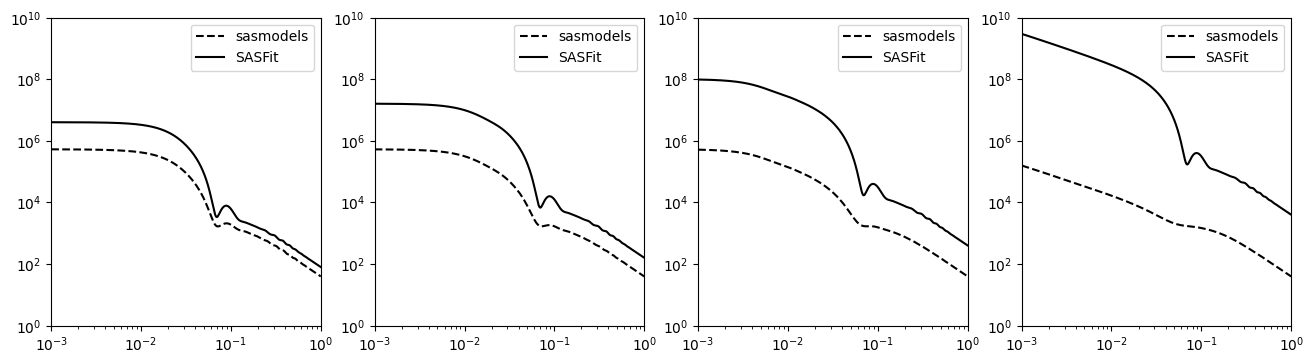

CPU times: user 1.04 s, sys: 106 ms, total: 1.14 s
Wall time: 624 ms


In [14]:
%%time

files = ["03_longrod_20nm", "03_longrod_40nm", "03_longrod_100nm", "03_longrod_1000nm"]
model = load_model("../models/longcylinder_micelle.py")
q_sasmodels = np.logspace(-3, 0, 1000)
kernel = model.make_kernel([q_sasmodels])

fig, axs = plt.subplots(1,4, figsize=(4*4, 1*4))
labels =['homogenous', 'shell', 'core']
linestyles = ['solid','dotted','dashed' ]
lengths = [200,400,1000,10000]
for i in range(4):
    cyl_params = {'v_core' : 4000.0,    
            'v_corona' : 4000.0,
            'sld_solvent' : 1.0,
            'sld_core' : 2.0,
            'sld_corona' : 2.0,
            'radius_core': 40.0,
            'length_core' : lengths[i],
            'rg': 10.0,
            'd_penetration':1.0,
            'n_aggreg' : 67.0,
            }
    Iq_sasmodels = call_kernel(kernel, cyl_params)
    axs[i].loglog(q_sasmodels, Iq_sasmodels, ls='--', color='k', label="sasmodels")
    data_sasfit = pd.read_csv("./SASFit/%s"%files[i], sep=";", header=None).iloc[:,[0,1]]
    q_sasfit = data_sasfit.iloc[:,0]*0.1 # to convert into angstroms
    Iq_sasfit = data_sasfit.iloc[:,1]
    axs[i].loglog(q_sasfit, Iq_sasfit, color='k', label="SASFit")

    axs[i].set_ylim([1e0, 1e10])
    axs[i].set_xlim([1e-3, 1e0])
    axs[i].legend()
plt.show()